In [4]:
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [1]:


df=pd.read_excel(r'/home/kirti/Data_sets/state_dist_sc.xls')
df

,State,District,Level,Name,TRU,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,0,0,India,India,Total,41694863,201378372,103535314,97843058,29200565,...,1513788,248943,89103,159840,1170872,671226,499646,119073620,48915441,70158179
1,0,0,India,India,Rural,31803775,153850848,79118287,74732561,23343585,...,1462695,212915,74530,138385,843174,460381,382793,88623154,37291478,51331676
2,0,0,India,India,Urban,9891088,47527524,24417027,23110497,5856980,...,51093,36028,14573,21455,327698,210845,116853,30450466,11623963,18826503
3,1,0,State,JAMMU & KASHMIR,Total,183020,924991,486232,438759,126717,...,2182,887,278,609,7581,5800,1781,604534,238698,365836
4,1,0,State,JAMMU & KASHMIR,Rural,149536,751026,392981,358045,107719,...,2114,836,261,575,6325,4805,1520,488024,194703,293321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,34,636,DISTRICT,Mahe,Rural,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919,34,636,DISTRICT,Mahe,Urban,31,144,77,67,11,...,0,0,0,0,0,0,0,75,36,39
1920,34,637,DISTRICT,Karaikal,Total,8888,35348,17206,18142,4201,...,198,21,4,17,171,77,94,21555,8073,13482
1921,34,637,DISTRICT,Karaikal,Rural,6249,24801,12113,12688,2985,...,166,16,3,13,96,41,55,14920,5635,9285


In [2]:
df.describe()

,State,District,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_LIT,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
count,1923.000000,1923.000000,1.923000e+03,1.923000e+03,1.923000e+03,1.923000e+03,1.923000e+03,1.923000e+03,1.923000e+03,1.923000e+03,...,1.923000e+03,1923.000000,1923.000000,1923.000000,1.923000e+03,1923.000000,1923.000000,1.923000e+03,1.923000e+03,1.923000e+03
mean,17.193448,305.226209,1.300932e+05,6.283257e+05,3.230431e+05,3.052826e+05,9.110941e+04,4.712439e+04,4.398502e+04,3.549454e+05,...,4.723207e+03,776.733229,278.012480,498.720749,3.653267e+03,2094.308892,1558.957878,3.715246e+05,1.526223e+05,2.189023e+05
std,9.543755,195.555449,1.264331e+06,6.127208e+06,3.152186e+06,2.975119e+06,9.054200e+05,4.681803e+05,4.372465e+05,3.406055e+06,...,5.071378e+04,8058.159288,2894.579963,5182.685246,3.527859e+04,20169.465078,15203.468828,3.614642e+06,1.493616e+06,2.121928e+06
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000,129.000000,7.585000e+03,3.664400e+04,1.884100e+04,1.801000e+04,4.913500e+03,2.517500e+03,2.407500e+03,2.233350e+04,...,4.100000e+01,22.000000,9.000000,12.000000,1.985000e+02,115.500000,73.000000,2.253050e+04,8.833500e+03,1.332450e+04
50%,19.000000,316.000000,2.854500e+04,1.363990e+05,6.944600e+04,6.603300e+04,1.758500e+04,9.086000e+03,8.423000e+03,8.304500e+04,...,3.970000e+02,93.000000,35.000000,57.000000,6.580000e+02,389.000000,257.000000,7.748300e+04,3.166000e+04,4.498900e+04
75%,24.000000,476.000000,6.903600e+04,3.408575e+05,1.769100e+05,1.653940e+05,5.041100e+04,2.605800e+04,2.427500e+04,1.828910e+05,...,2.028000e+03,315.500000,115.500000,198.000000,1.750000e+03,984.500000,747.000000,1.985815e+05,8.364400e+04,1.147540e+05
max,34.000000,637.000000,4.169486e+07,2.013784e+08,1.035353e+08,9.784306e+07,2.920056e+07,1.510337e+07,1.409720e+07,1.137600e+08,...,1.513788e+06,248943.000000,89103.000000,159840.000000,1.170872e+06,671226.000000,499646.000000,1.190736e+08,4.891544e+07,7.015818e+07


In [6]:
df_State=df[df['Level']=='State']
df_State

,State,District,Level,Name,TRU,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
3,1,0,State,JAMMU & KASHMIR,Total,183020,924991,486232,438759,126717,...,2182,887,278,609,7581,5800,1781,604534,238698,365836
4,1,0,State,JAMMU & KASHMIR,Rural,149536,751026,392981,358045,107719,...,2114,836,261,575,6325,4805,1520,488024,194703,293321
5,1,0,State,JAMMU & KASHMIR,Urban,33484,173965,93251,80714,18998,...,68,51,17,34,1256,995,261,116510,43995,72515
72,2,0,State,HIMACHAL PRADESH,Total,358212,1729252,876300,852952,216851,...,3994,2414,979,1435,17421,8976,8445,827691,361313,466378
73,2,0,State,HIMACHAL PRADESH,Rural,329620,1606535,812072,794463,203886,...,3949,2352,958,1394,16821,8570,8251,750208,331511,418697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,33,0,State,TAMIL NADU,Rural,2362864,9475475,4736003,4739472,1060828,...,72337,7245,2097,5148,39222,19978,19244,4521237,1940740,2580497
1811,33,0,State,TAMIL NADU,Urban,1229089,4962970,2468684,2494286,530629,...,7664,2781,947,1834,29865,18175,11690,2844147,1051938,1792209
1908,34,0,State,PUDUCHERRY,Total,45409,196325,95512,100813,22995,...,1251,72,23,49,851,491,360,121677,46188,75489
1909,34,0,State,PUDUCHERRY,Rural,25297,110425,53793,56632,13294,...,1160,50,20,30,460,257,203,66606,26221,40385


<IPython.core.display.Javascript object>


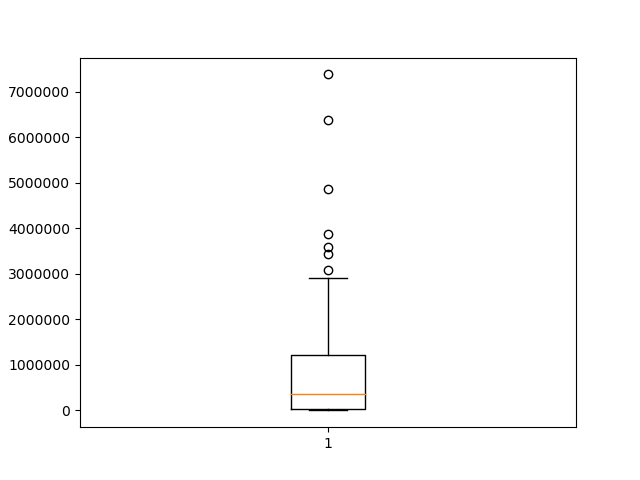

In [7]:
plt.figure()
_=plt.boxplot(df_State['No_HH_Head'])

<IPython.core.display.Javascript object>


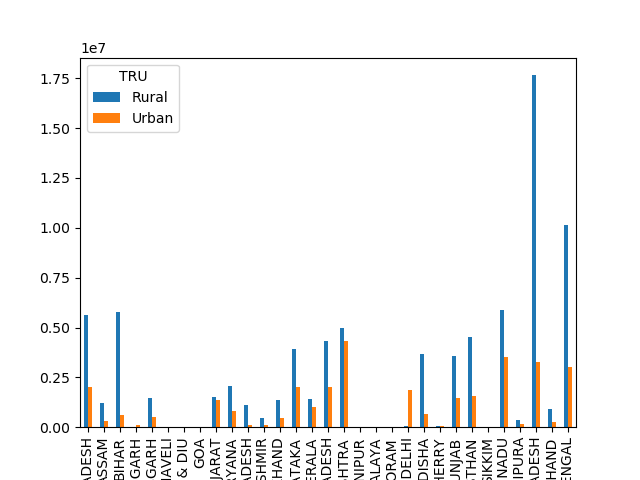

In [12]:
Rural_Urban=df_State[df_State['TRU']!='Total']
Literacy_States=Rural_Urban[['Name','TRU','M_LIT','F_LIT']]

Literacy_States= Literacy_States[Literacy_States.TRU != 'Total'].copy()[:]
Literacy_States['population'] = Literacy_States[['M_LIT', 'F_LIT']].sum(axis=1)
Literacy_States.groupby(['Name', 'TRU'])['population'].sum().unstack(1).plot.bar()

<IPython.core.display.Javascript object>


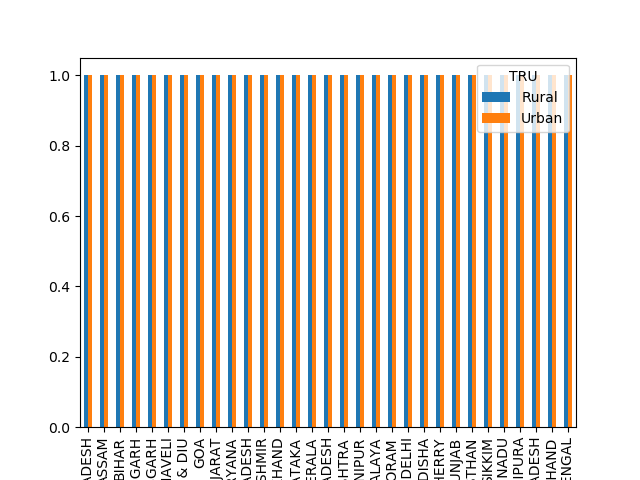

In [9]:
Rural_Urban=df_State[df_State['TRU']!='Total']
Literacy_States=Rural_Urban[['Name','TRU','M_LIT','F_LIT']]
#Literacy_States         #This dataframe consist of now only 4 columns as above

#Literacy_States.set_index('Name',inplace=True)   #Setting the index to be Name column
#Literacy_States.index.names=[None]    #Here I wanna remove the name of index column name , if you notice 

#Literacy_States=Literacy_States.groupby(['Name','TRU'])['M_LIT','F_LIT'].count().unstack('TRU').plot.bar()
Literacy_States.groupby(['Name','TRU'])['M_LIT','F_LIT'].count().reset_index().pivot('Name', 'TRU', 'M_LIT').plot.bar()

In [10]:
df=pd.DataFrame({'category': list('XYZXY'), 'B': range(5,10),'sex': list('mfmff')})
df

,category,B,sex
0,X,5,m
1,Y,6,f
2,Z,7,m
3,X,8,f
4,Y,9,f


<IPython.core.display.Javascript object>


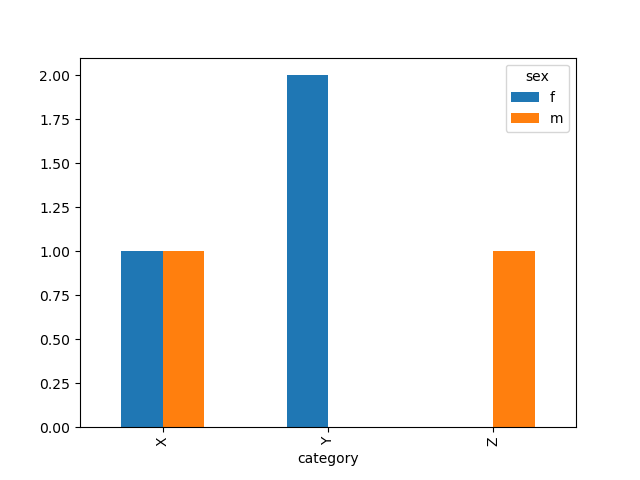

In [11]:
df.groupby(['sex','category'])['B'].count().unstack('sex').plot.bar()

In [10]:
total_df=df_State[df_State['TRU']=='Total']
total_df

,State,District,Level,Name,TRU,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
3,1,0,State,JAMMU & KASHMIR,Total,183020,924991,486232,438759,126717,...,2182,887,278,609,7581,5800,1781,604534,238698,365836
72,2,0,State,HIMACHAL PRADESH,Total,358212,1729252,876300,852952,216851,...,3994,2414,979,1435,17421,8976,8445,827691,361313,466378
111,3,0,State,PUNJAB,Total,1717888,8860179,4639875,4220304,1133963,...,49980,7163,2948,4215,64802,41179,23623,5680741,2136000,3544741
174,4,0,State,CHANDIGARH,Total,40694,199086,106356,92730,26516,...,4,25,6,19,713,474,239,125882,49304,76578
180,5,0,State,UTTARAKHAND,Total,363305,1892516,968586,923930,287591,...,5604,2101,955,1146,12433,8492,3941,1159302,499378,659924
222,6,0,State,HARYANA,Total,992096,5113615,2709656,2403959,760397,...,41378,2737,1258,1479,39091,26245,12846,3317737,1360366,1957371
288,7,0,State,NCT OF DELHI,Total,527307,2812309,1488800,1323509,359606,...,165,524,227,297,11001,8385,2616,1910672,727608,1183064
318,8,0,State,RAJASTHAN,Total,2279366,12221593,6355564,5866029,2028755,...,85101,8352,2722,5630,99970,38746,61224,6852986,3127171,3725815
420,9,0,State,UTTAR PRADESH,Total,7375437,41357608,21676975,19680633,6952439,...,370571,74541,32616,41925,264656,176266,88390,27111256,11301751,15809505
636,10,0,State,BIHAR,Total,3073109,16567325,8606253,7961072,3483257,...,220007,26497,9247,17250,64291,38889,25402,10498630,4579344,5919286


In [11]:
list(df)

['State',
 'District',
 'Level',
 'Name',
 'TRU',
 'No_HH_Head',
 'TOT_P',
 'TOT_M',
 'TOT_F',
 'P_06',
 'M_06',
 'F_06',
 'P_LIT',
 'M_LIT',
 'F_LIT',
 'P_ILL',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_P',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_P',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_P',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_P',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_P',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_P',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_P',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_P',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_P',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_P',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_P',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_P',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_P',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_P',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_P',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_P',
 'MARG_OT_3_6_M',
 'MARG_OT_3_6_F',
 'MARGWORK_0_3_P',
 'MARGWORK_0_3_M',
 'MARGWORK_0_3_F',
 'MARG_CL_0_3_P',

<IPython.core.display.Javascript object>


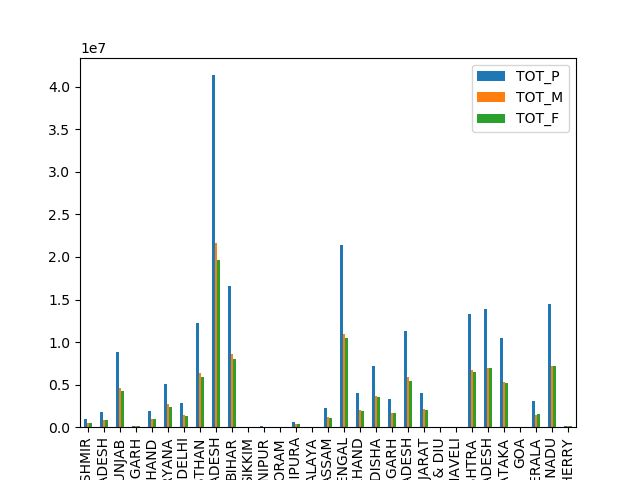

In [12]:


total_df.plot(x='Name',y=['TOT_P','TOT_M','TOT_F'],linewidth=10,kind='bar')

In [6]:
highestNW_women=np.max(df['NON_WORK_F'])
print(highestNW_women)

70158179


In [7]:
df_max_row = df[df["NON_WORK_F"] == highestNW_women]
df_max_row

,State,District,Level,Name,TRU,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,0,0,India,India,Total,41694863,201378372,103535314,97843058,29200565,...,1513788,248943,89103,159840,1170872,671226,499646,119073620,48915441,70158179


In [20]:
df_State.sort_values(by=['NON_WORK_F'], ascending=False)
df_State

,State,District,Level,Name,TRU,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
3,1,0,State,JAMMU & KASHMIR,Total,183020,924991,486232,438759,126717,...,2182,887,278,609,7581,5800,1781,604534,238698,365836
4,1,0,State,JAMMU & KASHMIR,Rural,149536,751026,392981,358045,107719,...,2114,836,261,575,6325,4805,1520,488024,194703,293321
5,1,0,State,JAMMU & KASHMIR,Urban,33484,173965,93251,80714,18998,...,68,51,17,34,1256,995,261,116510,43995,72515
72,2,0,State,HIMACHAL PRADESH,Total,358212,1729252,876300,852952,216851,...,3994,2414,979,1435,17421,8976,8445,827691,361313,466378
73,2,0,State,HIMACHAL PRADESH,Rural,329620,1606535,812072,794463,203886,...,3949,2352,958,1394,16821,8570,8251,750208,331511,418697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,33,0,State,TAMIL NADU,Rural,2362864,9475475,4736003,4739472,1060828,...,72337,7245,2097,5148,39222,19978,19244,4521237,1940740,2580497
1811,33,0,State,TAMIL NADU,Urban,1229089,4962970,2468684,2494286,530629,...,7664,2781,947,1834,29865,18175,11690,2844147,1051938,1792209
1908,34,0,State,PUDUCHERRY,Total,45409,196325,95512,100813,22995,...,1251,72,23,49,851,491,360,121677,46188,75489
1909,34,0,State,PUDUCHERRY,Rural,25297,110425,53793,56632,13294,...,1160,50,20,30,460,257,203,66606,26221,40385


In [21]:
onlyStates=df_State[df_State['TRU']=='Total']
onlyStates.head()


,State,District,Level,Name,TRU,No_HH_Head,TOT_P,TOT_M,TOT_F,P_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
3,1,0,State,JAMMU & KASHMIR,Total,183020,924991,486232,438759,126717,...,2182,887,278,609,7581,5800,1781,604534,238698,365836
72,2,0,State,HIMACHAL PRADESH,Total,358212,1729252,876300,852952,216851,...,3994,2414,979,1435,17421,8976,8445,827691,361313,466378
111,3,0,State,PUNJAB,Total,1717888,8860179,4639875,4220304,1133963,...,49980,7163,2948,4215,64802,41179,23623,5680741,2136000,3544741
174,4,0,State,CHANDIGARH,Total,40694,199086,106356,92730,26516,...,4,25,6,19,713,474,239,125882,49304,76578
180,5,0,State,UTTARAKHAND,Total,363305,1892516,968586,923930,287591,...,5604,2101,955,1146,12433,8492,3941,1159302,499378,659924


In [24]:
onlyStates.pivot_table(values='No_HH_Head',index='Name',columns='TRU',aggfunc=[np.max,np.mean])

,amax,mean
TRU,Total,Total
Name,,
ANDHRA PRADESH,3429973,3429973
ASSAM,468568,468568
BIHAR,3073109,3073109
CHANDIGARH,40694,40694
CHHATTISGARH,749457,749457
DADRA & NAGAR HAVELI,1353,1353
DAMAN & DIU,1288,1288
GOA,5545,5545
